C:\Users\19133\AppData\Local\Temp\ipykernel_17672\2933543408.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['workclass'] = X['workclass'].map(workclass_map)
C:\Users\19133\AppData\Local\Temp\ipykernel_17672\2933543408.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['education'] = X['education'].map(education_map)
C:\Users\19133\AppData\Local\Temp\ipykernel_17672\2933543408.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

0.5289701767556132


c:\Users\19133\CSCI\du_install\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 49.40%
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.57      0.75      0.65      7380
      <=50K.       0.28      0.18      0.22      3729
        >50K       0.47      0.41      0.44      2382
       >50K.       0.18      0.07      0.11      1162

    accuracy                           0.49     14653
   macro avg       0.37      0.35      0.35     14653
weighted avg       0.45      0.49      0.46     14653



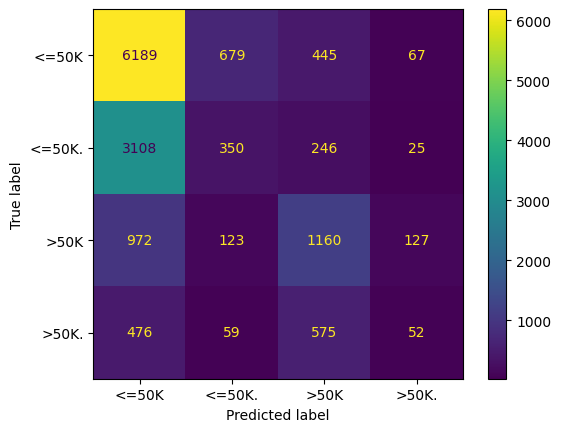

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Preprocessing
adult = fetch_ucirepo(id=2) 
X = adult.data.features 
y = adult.data.targets 
columns_to_one_hot = ['age', 'workclass', 'fnlwgt', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
sex_map = {'Male': 1, 'Female':2}
workclass_map = {'Private': 1, 'Self-emp-not-inc': 2, 'Self-emp-inc': 3, 'Federal-gov': 4, 'Local-gov': 5, 'State-gov': 6, 'Without-pay': 7, 'Never-worked': 8}
education_map = {'Bachelors': 1, 'Some-college': 2, '11th': 3, 'HS-grad': 4, 'Prof-school': 5, 'Assoc-acdm': 6, 'Assoc-voc': 7, '9th': 8, '7th-8th': 9, '12th': 10, 'Masters': 11, '1st-4th': 12, '10th': 13, 'Doctorate': 14, '5th-6th': 15, 'Preschool': 16}
maritalstatus_map = {'Married-civ-spouse': 1, 'Divorced': 2, 'Never-married': 3, 'Separated': 4, 'Widowed': 5, 'Married-spouse-absent': 6, 'Married-AF-spouse': 7}
occupation_map = {'Tech-support': 1, 'Craft-repair': 2, 'Other-service': 3, 'Sales': 4, 'Exec-managerial': 5, 'Prof-specialty': 6, 'Handlers-cleaners': 7, 'Machine-op-inspct': 8, 'Adm-clerical': 9, 'Farming-fishing': 10, 'Transport-moving': 11, 'Priv-house-serv': 12, 'Protective-serv': 13, 'Armed-Forces': 14}
relationship_map = {'Wife': 1, 'Own-child': 2, 'Husband': 3, 'Not-in-family': 4, 'Other-relative': 5, 'Unmarried': 6}
race_map = {'White': 1, 'Asian-Pac-Islander': 2, 'Amer-Indian-Eskimo': 3, 'Other': 4, 'Black': 5}
nativecountry_map = {'United-States': 1, 'Cambodia': 2, 'England': 4, 'Puerto-Rico': 5, 'Canada': 6, 'Germany': 7, 
                      'Outlying-US(Guam-USVI-etc)': 8, 'India': 9, 'Japan': 10, 'Greece': 11, 'South': 12, 'China': 13, 
                      'Cuba': 14, 'Iran': 15, 'Honduras': 16, 'Philippines': 17, 'Italy': 18, 'Poland': 19, 'Jamaica': 20, 
                      'Vietnam': 21, 'Mexico': 22, 'Portugal': 23, 'Ireland': 24, 'France': 25, 'Dominican-Republic': 26,
                      'Laos': 27, 'Ecuador': 28, 'Taiwan': 29, 'Haiti': 30, 'Columbia': 31, 'Hungary': 32, 'Guatemala': 33, 
                      'Nicaragua': 34, 'Scotland': 35, 'Thailand': 36, 'Yugoslavia': 37, 'El-Salvador': 38, 'Trinadad&Tobago': 39, 
                      'Peru': 40, 'Hong': 41, 'Holand-Netherlands': 42}
X['workclass'] = X['workclass'].map(workclass_map)
X['education'] = X['education'].map(education_map)
X['marital-status'] = X['marital-status'].map(maritalstatus_map)
X['occupation'] = X['occupation'].map(occupation_map)
X['relationship'] = X['relationship'].map(relationship_map)
X['race'] = X['race'].map(race_map)
X['native-country'] = X['native-country'].map(nativecountry_map)
X['sex'] = X['sex'].map(sex_map)
#was getting an error for NaN values and I used mean to sub that.
X = X.fillna(X.mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)
knn = KNeighborsClassifier(n_neighbors=13) 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))
confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#chose to use accuracy as a function because I had a migrane and my eyes hurt to look at it.
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {:.2f}%".format(accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

(5 pts) Take a supervised learning model you recently created and apply one dimensionality-reduction technique different from the TruncatedSVD, since we did that in class. How did it influence the performance? Why do you think that is?

So applying one dimensionality reduction technique is important it transforms the pre-processing step for ML for classification and regression to create the best outcome. Essentially the best of the best and in this case I chose to use LDA because it suited our needs for this dataset better, we had a lot of continous and str variables in this dataset so when I preprocessed them to numerical values but of course some things slip through the cracks so LDA was better because it makes all the classes a binary classification and it actually improved the original Accuracy from 49.04 to 53.3%. There was an overall decrease in performance for the one-directionality approach because LDA wasn't suited well in this case. It led to classes overlapping with eachother and as a result the class lines blurred and made it less concise. Thats why this one directionality technique hurt the model in this case. 

In [7]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from numpy import mean, std
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cumalitive accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Classification Report:\n", classification_report(y_test, y_pred))

Cumalitive accuracy: 0.553 (0.004)
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.57      0.75      0.65      7380
      <=50K.       0.28      0.18      0.22      3729
        >50K       0.47      0.41      0.44      2382
       >50K.       0.18      0.07      0.11      1162

    accuracy                           0.49     14653
   macro avg       0.37      0.35      0.35     14653
weighted avg       0.45      0.49      0.46     14653

